In [26]:
import numpy as np
import pandas as pd 

In [27]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
sex=df["gender"].value_counts()
sex

female    518
male      482
Name: gender, dtype: int64

In [30]:
group=df['race/ethnicity'].value_counts()
group

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [31]:
subjects=['math score','reading score','writing score']


In [32]:
dataset=df.groupby('gender')[subjects].mean()
dataset

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [33]:
import matplotlib.pyplot as plt
from matplotlib import style

In [34]:
sex=df["gender"].unique()

In [35]:
count=list(df["gender"].value_counts())
count

[518, 482]

In [55]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


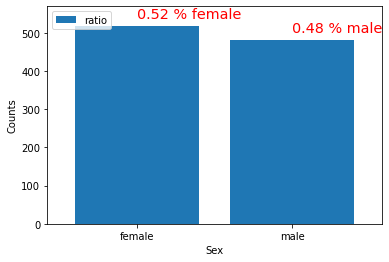

In [49]:
count=list(df["gender"].value_counts())
plt.bar(df["gender"].unique(),df["gender"].value_counts(),align="center",label="ratio")

for i in range(len(count)):
    plt.text(sex[i],count[i]+20,str(round(count[i]/len(df["gender"]),2))+" % "+sex[i],color="r",fontsize="x-large")

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.legend(loc="upper left")
plt.margins(0.1)
plt.show()

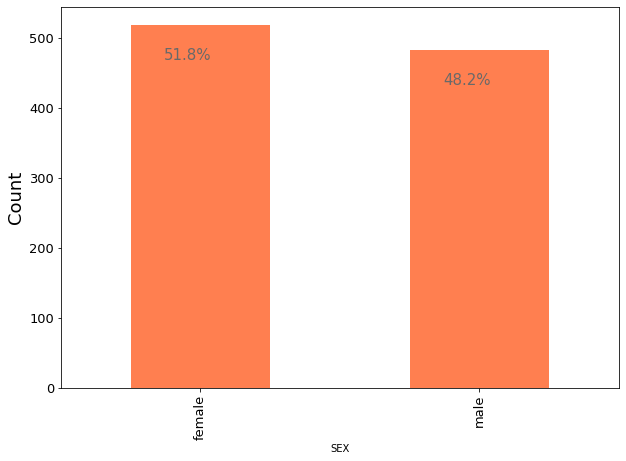

In [85]:
ax = df['gender'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_ylabel("Count", fontsize=18);
ax.set_xlabel("SEX")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.12, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')